# Demographic Profiling of Respondants

I am  interested in determining how a set of demographic and general political attributes links to a set of behaviors related to meat eating. 


Set of Demographics:
    Age
    Gender
    Region
    urbanicity
    education
    would_vote_for
    political_orientation
    ethnicity
    religion


Set of Behaviors or Attitudes:
  current diet - current_diet
  tried vegan ever - tried_veg_ever
  reduce red meat last year - reduce_red_meat_past_yr


In [3]:
!pip install pandas seaborn scikit-learn matplotlib

In [4]:
!pip freeze

aiohappyeyeballs==2.4.4
aiohttp==3.10.11
aiosignal==1.3.1
alembic==1.14.0
anaconda-anon-usage @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_3eler6mjxh/croot/anaconda-anon-usage_1710965076906/work
anyio==4.6.2.post1
apache-airflow==2.10.3
apache-airflow-providers-common-compat==1.2.2
apache-airflow-providers-common-io==1.4.2
apache-airflow-providers-common-sql==1.20.0
apache-airflow-providers-fab==1.5.1
apache-airflow-providers-ftp==3.11.1
apache-airflow-providers-http==4.13.3
apache-airflow-providers-imap==3.7.0
apache-airflow-providers-smtp==1.8.1
apache-airflow-providers-sqlite==3.9.1
apispec==6.8.0
appnope @ file:///home/conda/feedstock_root/build_artifacts/appnope_1707233003401/work
archspec @ file:///croot/archspec_1709217642129/work
argcomplete==3.5.1
asgiref==3.8.1
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1698341106958/work
attrs @ file:///private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_73lbj1xbpc/croot/attrs_172

In [5]:
import pandas as pd

df_large = pd.read_csv("data/summer_survey_2024_cleaned.csv")

demographic_cols = ['age', 'gender', 'region','urbanicity',
                    'education','would_vote_for', 'political_orientation', 
                    'ethnicity', 'religion']
response = ['current_diet','tried_veg_ever','reduce_red_meat_past_yr']

df = df_large[demographic_cols + response]


In [6]:
df.current_diet.value_counts()

current_diet
Meat-eater (no restrictions on eating animal products)                                                550
Meat-reducer (reducing meat consumption or only eating it occasionally)                               307
Meat-free/Vegetarian (eats plant-based foods, eggs, and dairy)                                         62
Fish eater (eats plant-based foods, eggs, dairy, and fish)                                             45
Completely plant-based/Vegan (eats only plant-based/vegan foods, does not eat any animal products)     18
Name: count, dtype: int64

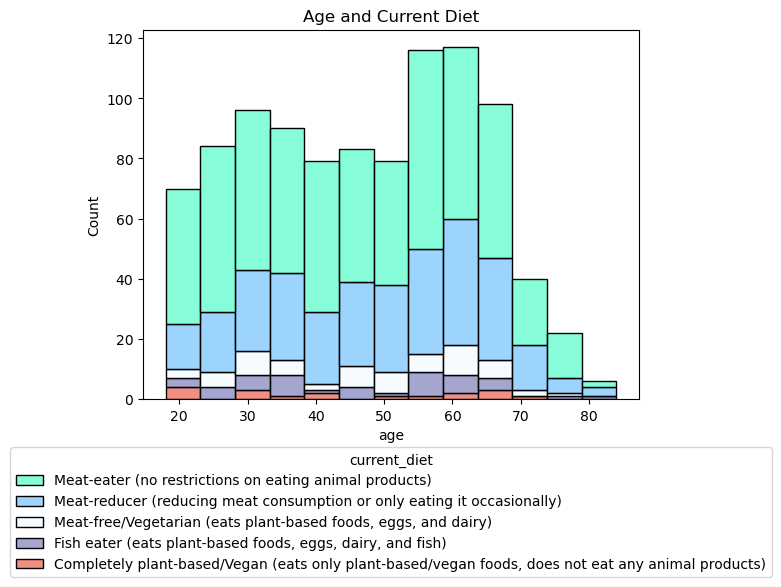

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette(["#5DFDCB","#7CC6FE","#F4FAFF","#8789C0","#ED6A5A"])
g = sns.histplot(data = df,x="age", hue="current_diet", multiple="stack", palette=palette)
sns.move_legend(plt.gca(), "lower center", bbox_to_anchor=(0.5, -0.5))
g.set_title("Age and Current Diet")
plt.show()

It's hard to see resolution on the smaller categories because the majority of the dataset are meat-eaters. Excluding the category and continuing to visualize

In [15]:
df_no_meat = df[df['current_diet']!="Meat-eater (no restrictions on eating animal products)"]

In [16]:
df_no_meat.current_diet.value_counts()

current_diet
Meat-reducer (reducing meat consumption or only eating it occasionally)                               307
Meat-free/Vegetarian (eats plant-based foods, eggs, and dairy)                                         62
Fish eater (eats plant-based foods, eggs, dairy, and fish)                                             45
Completely plant-based/Vegan (eats only plant-based/vegan foods, does not eat any animal products)     18
Name: count, dtype: int64

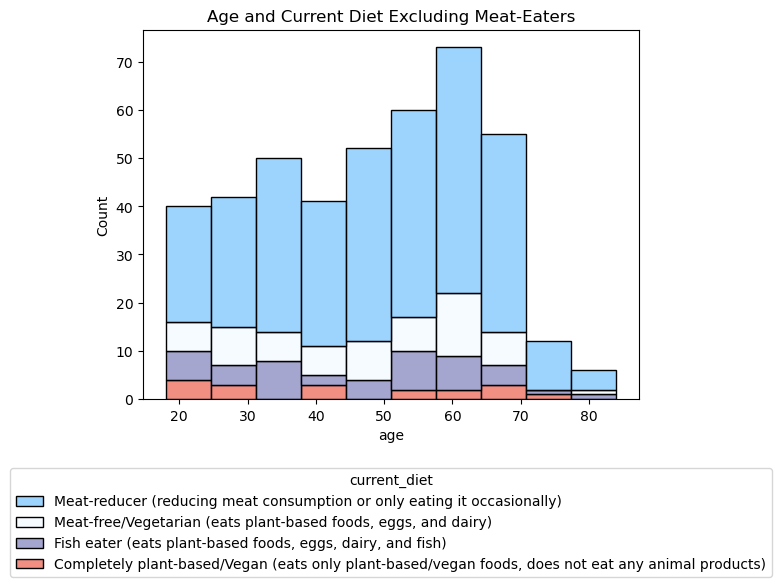

In [10]:

smol_palette = sns.color_palette(["#7CC6FE","#F4FAFF","#8789C0","#ED6A5A"])
g = sns.histplot(data = df_no_meat,x="age", hue="current_diet", multiple="stack", palette=smol_palette)
sns.move_legend(plt.gca(), "lower center", bbox_to_anchor=(0.5, -0.5))
g.set_title("Age and Current Diet Excluding Meat-Eaters")
plt.show()

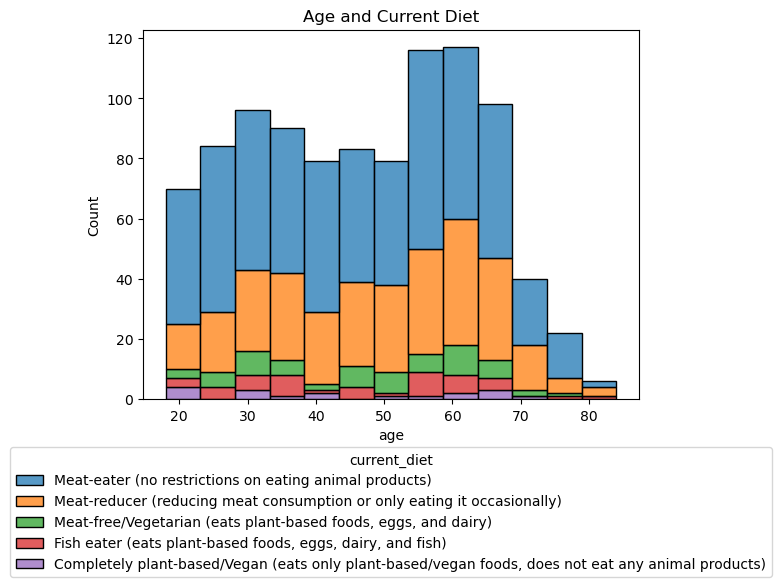

In [17]:
df


g = sns.histplot(data = df,x="age", hue="current_diet", multiple="stack")
sns.move_legend(plt.gca(), "lower center", bbox_to_anchor=(0.5, -0.5))
g.set_title("Age and Current Diet")
plt.show()

## Change Variable Structure

must all be numeric, no categorical columns

In [18]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(df[demographic_cols])
demo_df = pd.DataFrame(enc.transform(df[demographic_cols]), columns=demographic_cols)

enc.fit(df[response])
response_df = pd.DataFrame(enc.transform(df[response]), columns=response)

big_df = demo_df + response_df


In [30]:
combo = response +demographic_cols
enc.fit(df[combo])
combo_df = pd.DataFrame(enc.transform(df[combo]), columns=combo)

## Obtain Raw Canonical Coefficients

## Determine Which are Statistically Significant

## Obtain Standardized Canonical Coefficients

## Obtain Loadings/Structure Coefficients

## Check for Multicollinearity

T

<Axes: >

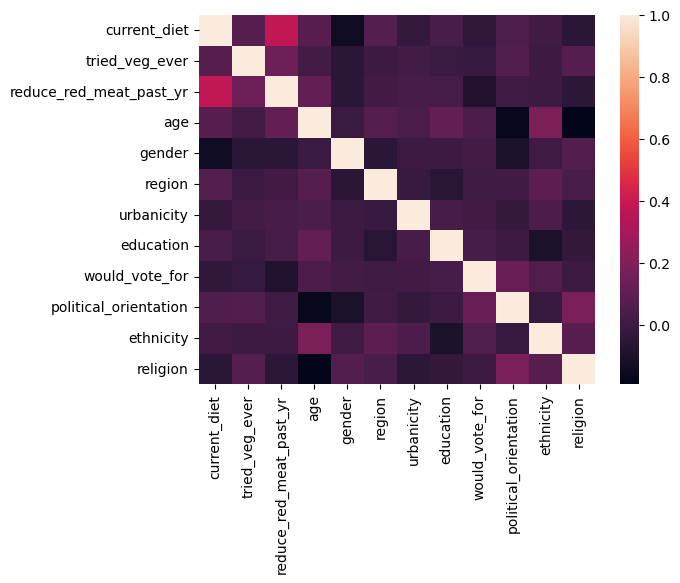

In [31]:
import seaborn as sns

num_corr = combo_df.corr()
sns.heatmap(num_corr)

## Canonical Variant Analysis



In [ ]:
f





1.0


In [33]:
import missingno as msno

<Axes: >

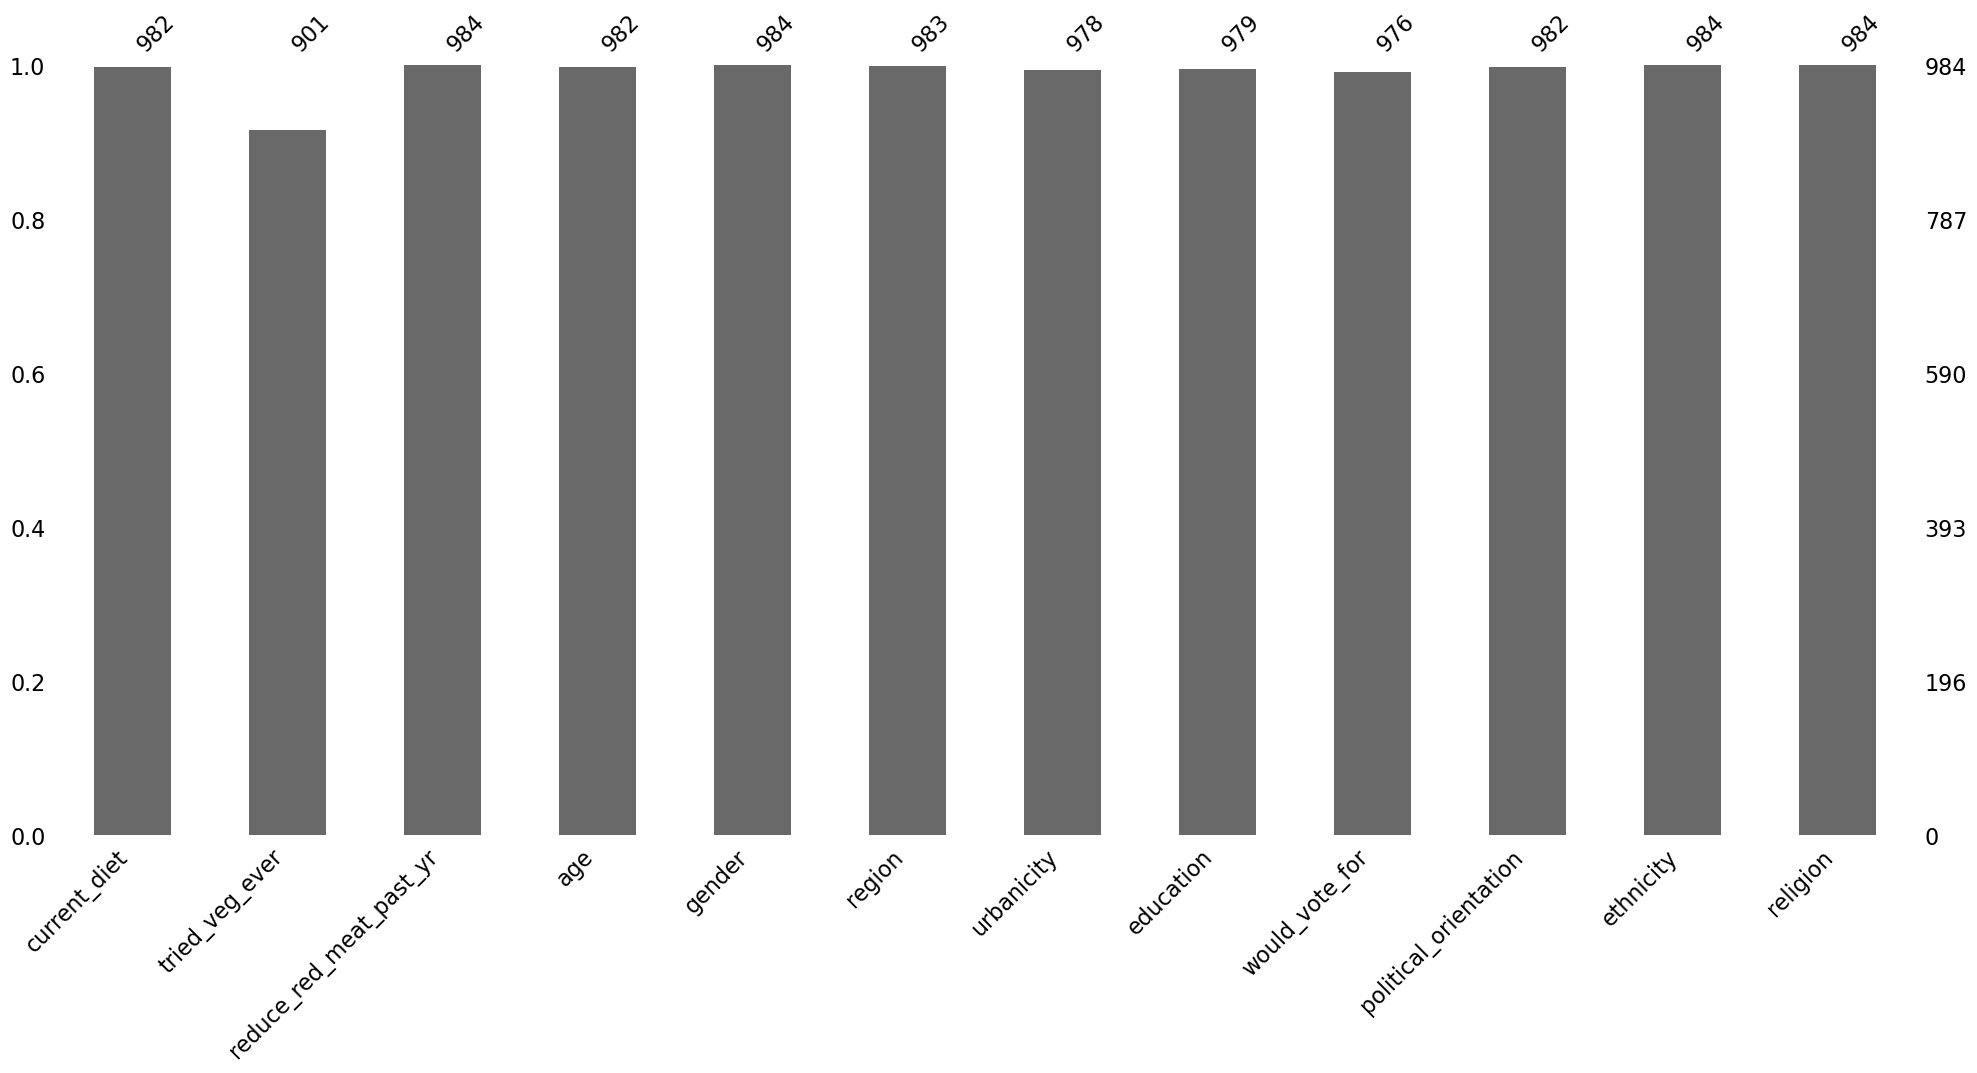

In [38]:
msno.bar(combo_df)

In [36]:
combo_df_small = combo_df.dropna()


In [ ]:
X = combo_df_small[demographic_cols]
Y = combo_df_small[response]


In [45]:
from sklearn.cross_decomposition import CCA
import numpy as np


# Create a CCA object
cca = CCA(n_components=1)
# Fit the model
fit_cca = cca.fit(X, Y)

# Transform the data
X_c, Y_c = cca.transform(X, Y)

# Print the canonical correlations
print(np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

0.22718530421801417


In [ ]:
#The coefficients of the linear model such that Y is approximated as Y = X @ coef_.T + intercept_.
fit_cca.coef_
#We may interpret the raw coefficients in much the same way we interpret raw regression coefficients.  For example, with respect to the first canonical X variate, holding all other X variables constant,
#  a one unit increase in X1, is associated with a .6217 decrease in the first canonical variate (or latent variable, u1),

array([[ 0.02538436, -0.88235649,  0.05833221,  0.02738567,  0.11324685,
        -0.18516322,  0.19778265, -0.02735928, -0.04381172],
       [ 0.00767276, -0.26670409,  0.01763169,  0.00827768,  0.03423038,
        -0.05596807,  0.05978246, -0.00826971, -0.01324268],
       [ 0.00994042, -0.34552752,  0.02284268,  0.01072412,  0.04434704,
        -0.07250923,  0.07745095, -0.01071379, -0.0171565 ]])

In [51]:
fit_cca.intercept_

array([2.63522727, 1.39204545, 0.41022727])

In [ ]:
# Make sure you change n (sample size), p (IVs), q (DVs)
p.asym(rho = cva$cor, 
#N = 984, p = 9, q = 3)

In [ ]:
statsmodels

,current_diet,tried_veg_ever,reduce_red_meat_past_yr,age,gender,region,urbanicity,education,would_vote_for,political_orientation,ethnicity,religion
0,2.0,3.0,0.0,8.0,0.0,4.0,0.0,1.0,2.0,3.0,5.0,5.0
1,4.0,1.0,1.0,28.0,0.0,10.0,1.0,1.0,2.0,2.0,5.0,1.0
2,4.0,1.0,1.0,18.0,1.0,10.0,1.0,1.0,2.0,3.0,5.0,5.0
3,4.0,3.0,1.0,25.0,1.0,0.0,1.0,1.0,2.0,2.0,5.0,5.0
4,4.0,1.0,1.0,12.0,0.0,7.0,0.0,1.0,2.0,2.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.0,1.0,1.0,40.0,0.0,2.0,1.0,4.0,3.0,2.0,2.0,1.0
980,2.0,1.0,1.0,38.0,1.0,6.0,1.0,2.0,4.0,4.0,1.0,3.0
981,2.0,1.0,0.0,47.0,0.0,7.0,2.0,3.0,5.0,4.0,1.0,1.0
982,2.0,1.0,1.0,34.0,1.0,3.0,0.0,4.0,2.0,3.0,5.0,5.0


In [53]:
demographic_cols

['age',
 'gender',
 'region',
 'urbanicity',
 'education',
 'would_vote_for',
 'political_orientation',
 'ethnicity',
 'religion']

In [57]:
response

['current_diet', 'tried_veg_ever', 'reduce_red_meat_past_yr']